# Genetic Algorithm

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from ga import GA
from functions import sphere, rastringin, ackley

## Analisar o impacto dos parâmetros do GA na solução das funções de teste.
* Variar o tamanho da população no intervalo [30 - 100] em passos de 10. 
* Mostrar resultado em um gráfico com tamanho da população vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções (exemplo).

### Sphere

In [23]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(sphere, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [24]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(rastringin, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [ ]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(ackley, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

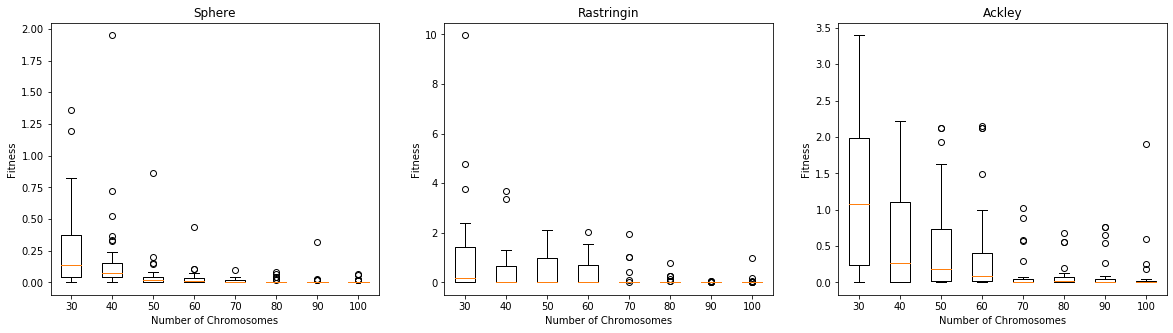

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Number of Chromosomes")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Number of Chromosomes")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Number of Chromosomes")

plt.show()

# Variar taxa de cruzamento no intervalo [50% - 100%] em passos de 10.
* Mostrar resultado em um gráfico com taxa de cruzamento vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções.


# Variar tipo de cruzamento entre as opções: cruzamento 1 ponto, cruzamento 2 pontos.
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão duas séries neste gráfico, uma para cada tipo de cruzamento
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).


# Variar tipo de seleção de sobrevivência entre: elitismo, roleta e aleatória
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão três séries neste gráfico, uma para cada tipo de seleção
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro.


In [15]:
num_gen=100
num_exec=30
x = np.arange(1, num_gen+1, 1) # iteration number array

### Sphere

In [16]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_e = []
sphere_iter_results_e = [[] for i in range(num_gen)]
sphere_iter_mean_e = []
sphere_iter_std_e = []

sphere_best_fitnesses_ro = []
sphere_iter_results_ro = [[] for i in range(num_gen)]
sphere_iter_mean_ro = []
sphere_iter_std_ro = []

sphere_best_fitnesses_ra = []
sphere_iter_results_ra = [[] for i in range(num_gen)]
sphere_iter_mean_ra = []
sphere_iter_std_ra = []

ga_e = GA(sphere, bounds, generations=num_gen, sel_strategy='elitist')
ga_ro = GA(sphere, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(sphere, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    sphere_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    sphere_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    sphere_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_e)):
    for j in range(len(sphere_best_fitnesses_e[i])):
        sphere_iter_results_e[j].append(sphere_best_fitnesses_e[i][j])
        sphere_iter_results_ro[j].append(sphere_best_fitnesses_ro[i][j])
        sphere_iter_results_ra[j].append(sphere_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_e)):
    sphere_iter_mean_e.append(np.mean(sphere_iter_results_e[i]))
    sphere_iter_std_e.append(np.std(sphere_iter_results_e[i]))
    
    sphere_iter_mean_ro.append(np.mean(sphere_iter_results_ro[i]))
    sphere_iter_std_ro.append(np.std(sphere_iter_results_ro[i]))

    sphere_iter_mean_ra.append(np.mean(sphere_iter_results_ra[i]))
    sphere_iter_std_ra.append(np.std(sphere_iter_results_ra[i]))

### Sphere - Results

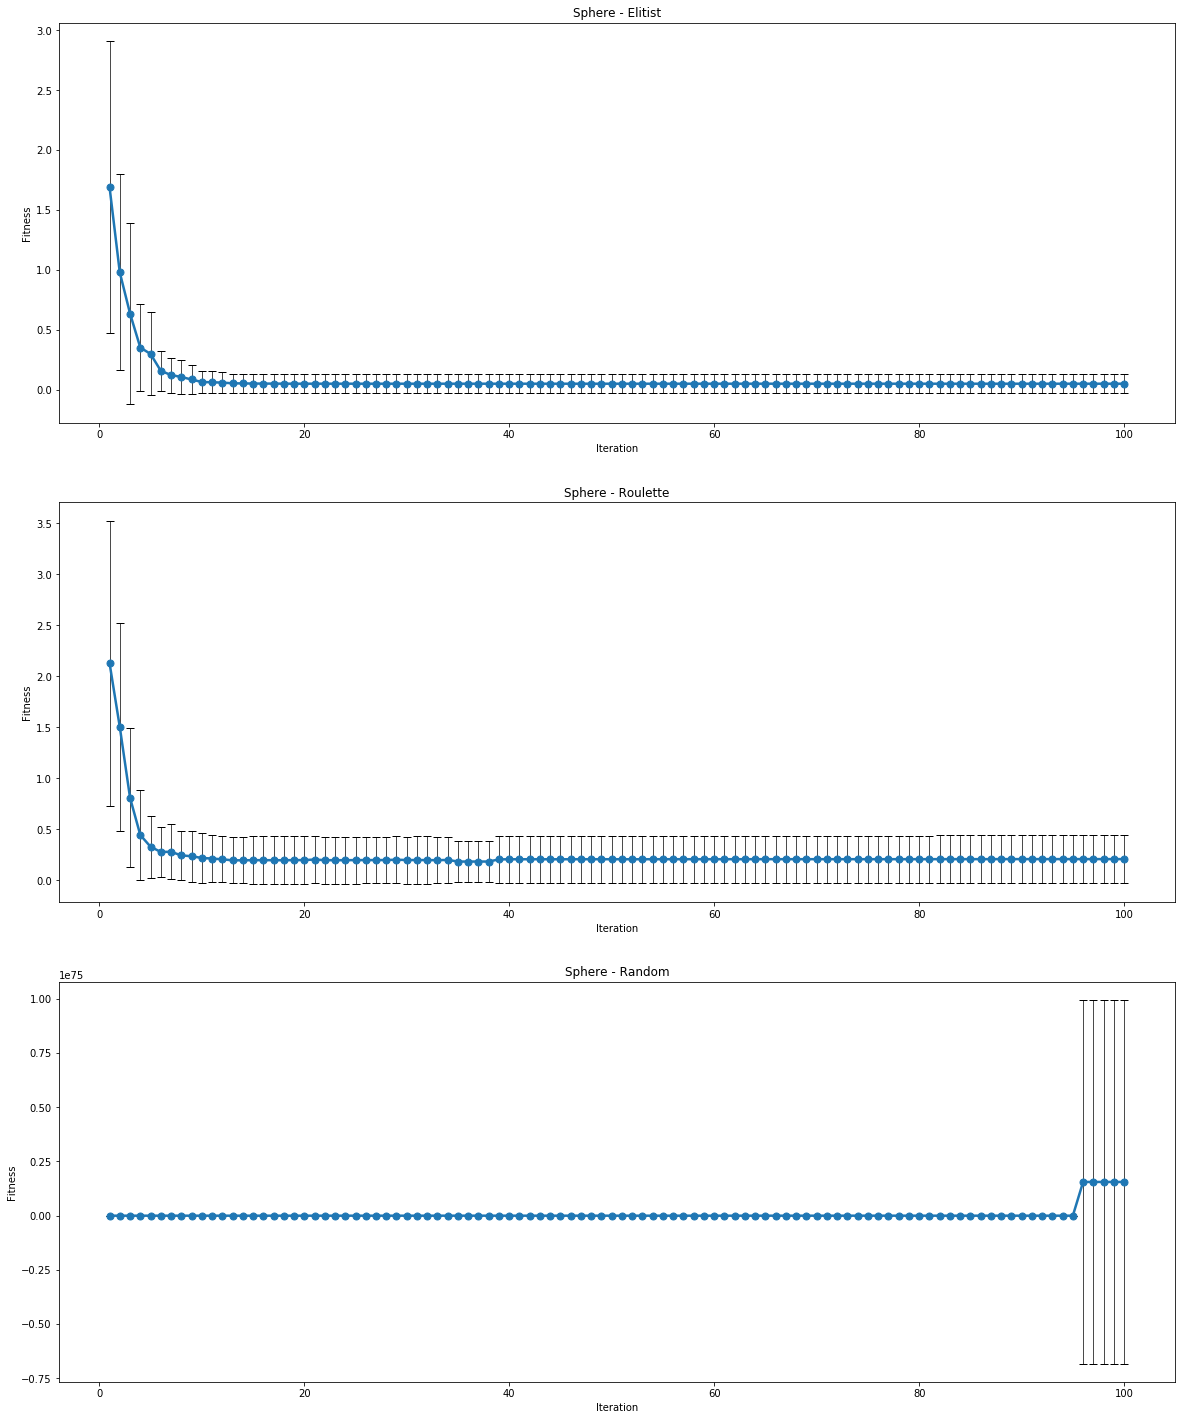

In [17]:
plt.figure(figsize=(20, 25))

plt.subplot(3, 1, 1)
plt.errorbar(x, np.array(sphere_iter_mean_e), np.array(sphere_iter_std_e), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Sphere - Elitist')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 2)
plt.errorbar(x, np.array(sphere_iter_mean_ro), np.array(sphere_iter_std_ro), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Sphere - Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 3)
plt.errorbar(x, np.array(sphere_iter_mean_ra), np.array(sphere_iter_std_ra), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Sphere - Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.show() 

### Rastringin

In [18]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_e = []
rastringin_iter_results_e = [[] for i in range(num_gen)]
rastringin_iter_mean_e = []
rastringin_iter_std_e = []

rastringin_best_fitnesses_ro = []
rastringin_iter_results_ro = [[] for i in range(num_gen)]
rastringin_iter_mean_ro = []
rastringin_iter_std_ro = []

rastringin_best_fitnesses_ra = []
rastringin_iter_results_ra = [[] for i in range(num_gen)]
rastringin_iter_mean_ra = []
rastringin_iter_std_ra = []

ga_e = GA(rastringin, bounds, generations=num_gen, sel_strategy='elitist')
ga_ro = GA(rastringin, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(rastringin, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    rastringin_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    rastringin_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    rastringin_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_e)):
    for j in range(len(rastringin_best_fitnesses_e[i])):
        rastringin_iter_results_e[j].append(rastringin_best_fitnesses_e[i][j])
        rastringin_iter_results_ro[j].append(rastringin_best_fitnesses_ro[i][j])
        rastringin_iter_results_ra[j].append(rastringin_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_e)):
    rastringin_iter_mean_e.append(np.mean(rastringin_iter_results_e[i]))
    rastringin_iter_std_e.append(np.std(rastringin_iter_results_e[i]))
    
    rastringin_iter_mean_ro.append(np.mean(rastringin_iter_results_ro[i]))
    rastringin_iter_std_ro.append(np.std(rastringin_iter_results_ro[i]))

    rastringin_iter_mean_ra.append(np.mean(rastringin_iter_results_ra[i]))
    rastringin_iter_std_ra.append(np.std(rastringin_iter_results_ra[i]))

### Rastringin - Results

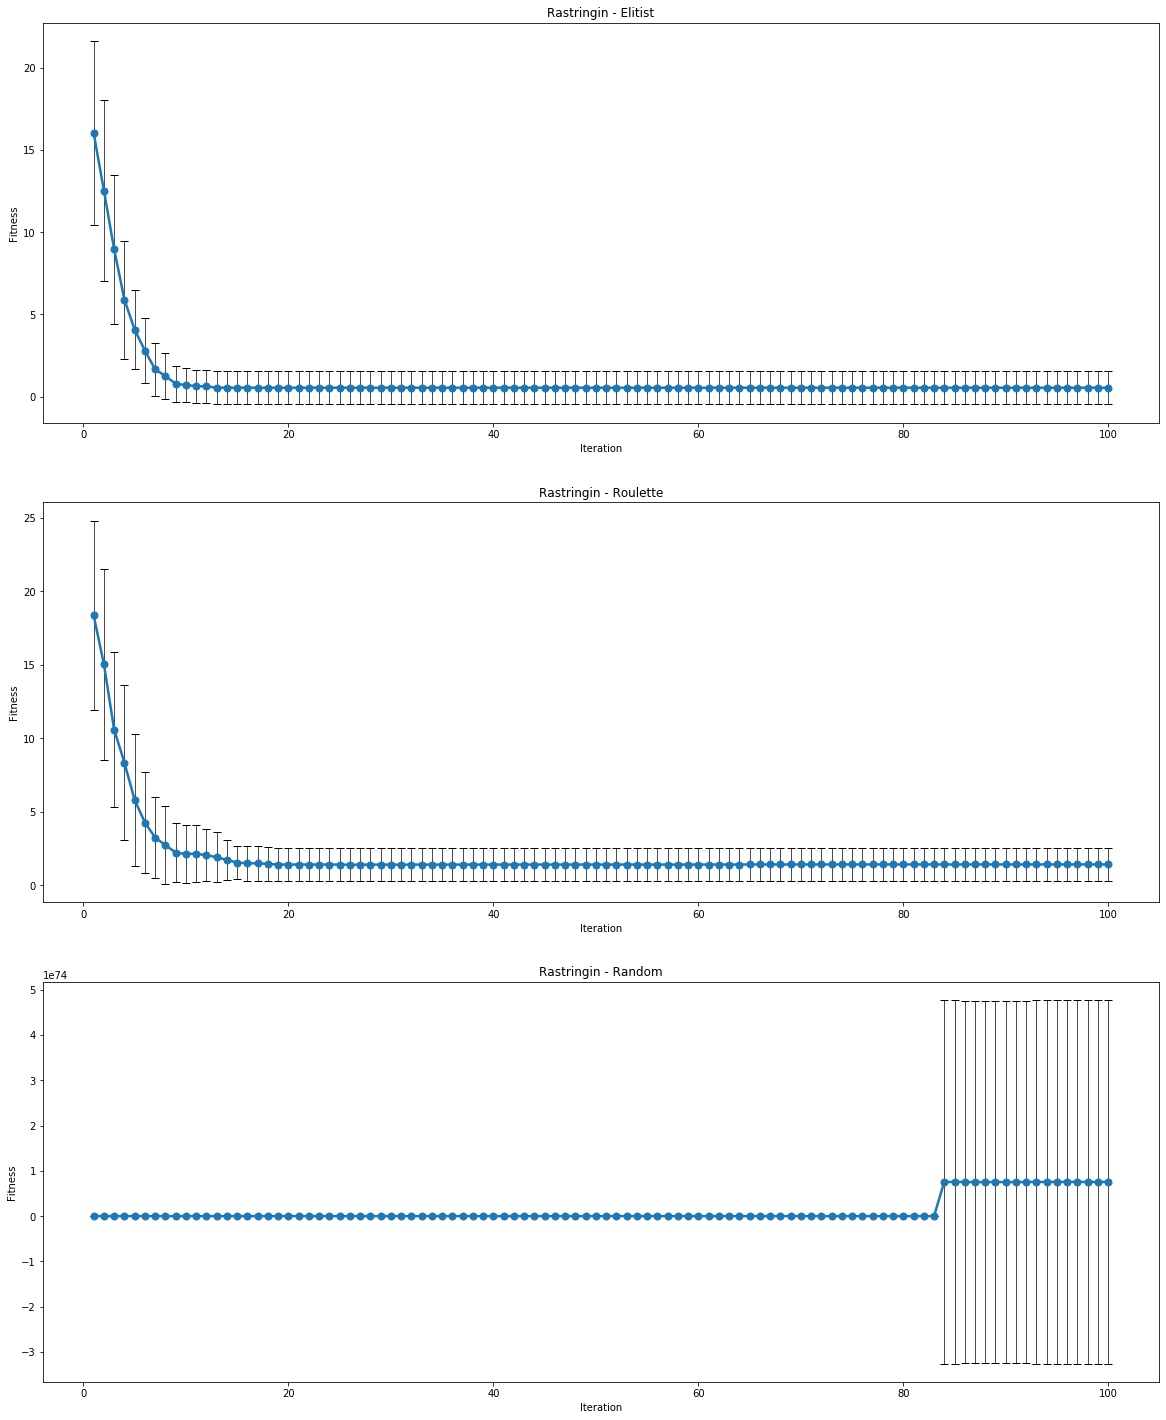

In [19]:
plt.figure(figsize=(20, 25))

plt.subplot(3, 1, 1)
plt.errorbar(x, np.array(rastringin_iter_mean_e), np.array(rastringin_iter_std_e), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Rastringin - Elitist')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 2)
plt.errorbar(x, np.array(rastringin_iter_mean_ro), np.array(rastringin_iter_std_ro), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Rastringin - Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 3)
plt.errorbar(x, np.array(rastringin_iter_mean_ra), np.array(rastringin_iter_std_ra), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Rastringin - Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.show() 

### Ackley

In [20]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_e = []
ackley_iter_results_e = [[] for i in range(num_gen)]
ackley_iter_mean_e = []
ackley_iter_std_e = []

ackley_best_fitnesses_ro = []
ackley_iter_results_ro = [[] for i in range(num_gen)]
ackley_iter_mean_ro = []
ackley_iter_std_ro = []

ackley_best_fitnesses_ra = []
ackley_iter_results_ra = [[] for i in range(num_gen)]
ackley_iter_mean_ra = []
ackley_iter_std_ra = []

ga_e = GA(ackley, bounds, generations=num_gen, sel_strategy='elitist')
ga_ro = GA(ackley, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(ackley, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    ackley_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    ackley_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    ackley_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_e)):
    for j in range(len(ackley_best_fitnesses_e[i])):
        ackley_iter_results_e[j].append(ackley_best_fitnesses_e[i][j])
        ackley_iter_results_ro[j].append(ackley_best_fitnesses_ro[i][j])
        ackley_iter_results_ra[j].append(ackley_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_e)):
    ackley_iter_mean_e.append(np.mean(ackley_iter_results_e[i]))
    ackley_iter_std_e.append(np.std(ackley_iter_results_e[i]))
    
    ackley_iter_mean_ro.append(np.mean(ackley_iter_results_ro[i]))
    ackley_iter_std_ro.append(np.std(ackley_iter_results_ro[i]))

    ackley_iter_mean_ra.append(np.mean(ackley_iter_results_ra[i]))
    ackley_iter_std_ra.append(np.std(ackley_iter_results_ra[i]))

### Ackley - Results

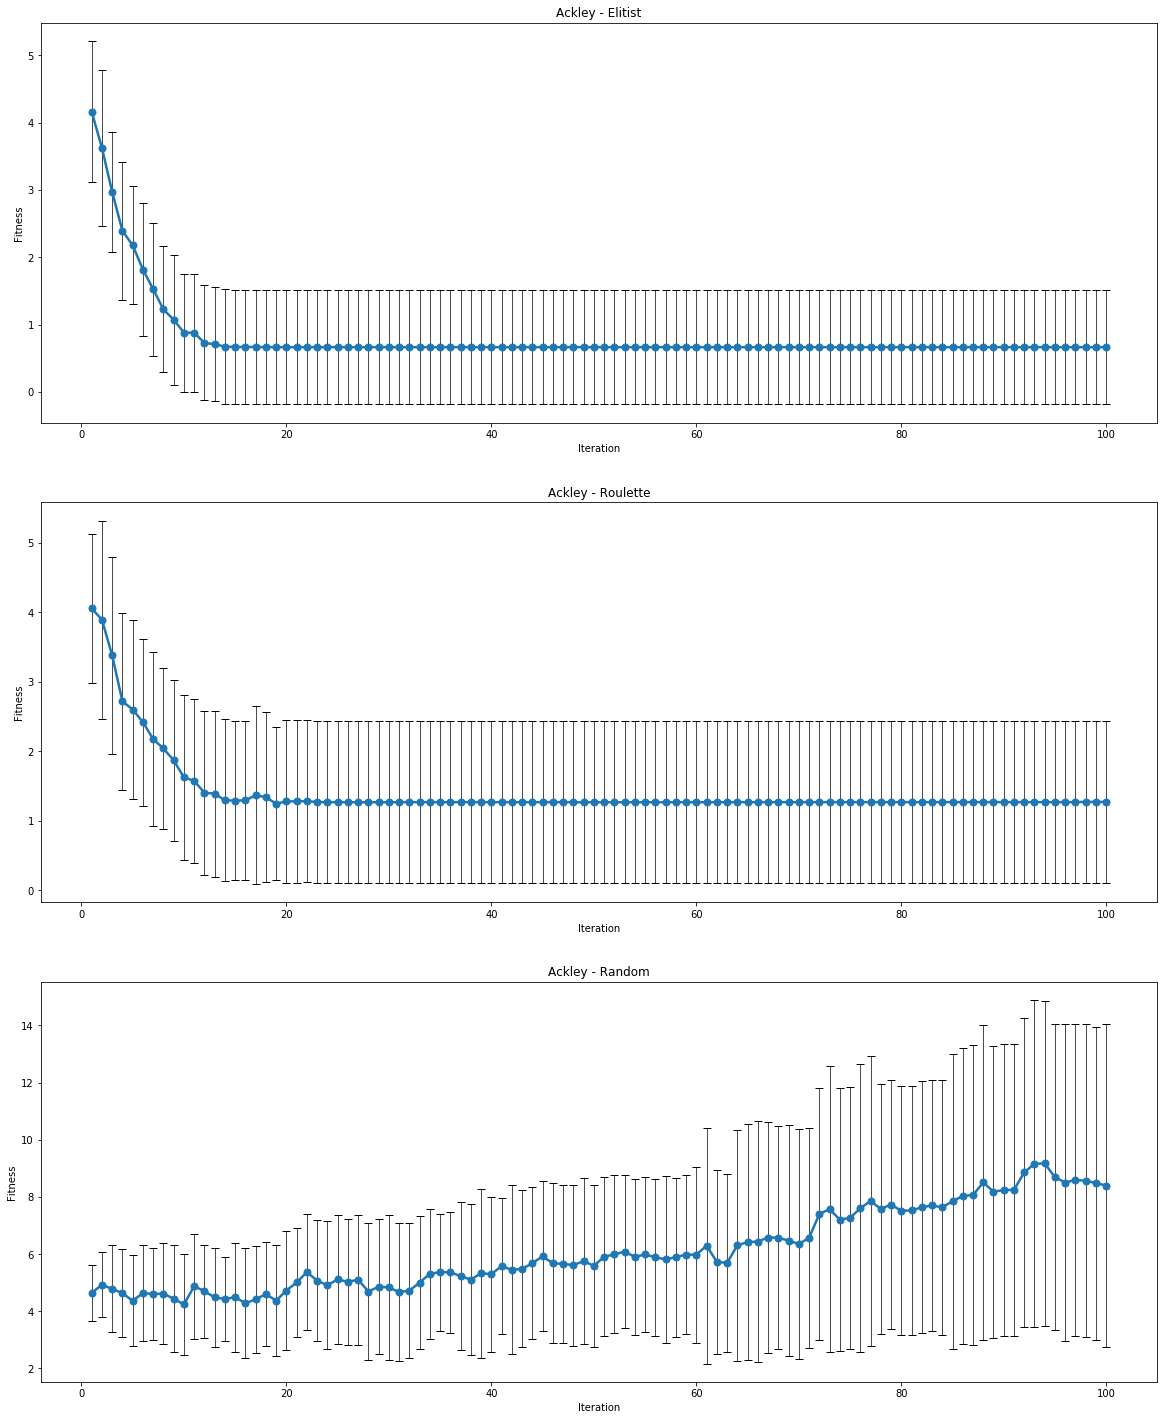

In [21]:
plt.figure(figsize=(20, 25))

plt.subplot(3, 1, 1)
plt.errorbar(x, np.array(ackley_iter_mean_e), np.array(ackley_iter_std_e), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Ackley - Elitist')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 2)
plt.errorbar(x, np.array(ackley_iter_mean_ro), np.array(ackley_iter_std_ro), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Ackley - Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.subplot(3, 1, 3)
plt.errorbar(x, np.array(ackley_iter_mean_ra), np.array(ackley_iter_std_ra), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Ackley - Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")

plt.show() 